In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$\gamma \geq \dfrac{3-S^2_\infty}{3(1+S^2_\infty)}$$

In [2]:
def gamma_lower_limit_no_delta(S):
    return (3-S**2)/(3*(1+S**2))

In [3]:
def gamma_upper_limit_no_delta(S):
    return (1+S**2)**(-1)

In [4]:
Sinf = np.arange(-10**(-3),3,0.0001)
g = gamma_lower_limit_no_delta(Sinf)

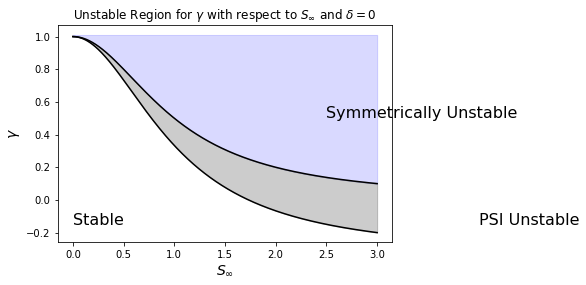

In [5]:
plt.fill_between(Sinf,g,gamma_upper_limit_no_delta(Sinf),color="k",alpha=0.2)
plt.fill_between(Sinf,gamma_upper_limit_no_delta(Sinf),1.01,color="b",alpha=0.15)
plt.plot(Sinf,gamma_upper_limit_no_delta(Sinf),c="k")
plt.plot(Sinf,g,c="k")
plt.ylabel(r"$\gamma$",fontsize=14)
plt.xlabel(r"$S_\infty$",fontsize=14)
plt.text(2.5,0.5,"Symmetrically Unstable",fontsize=16)
plt.text(4,-0.15,"PSI Unstable",fontsize=16)
plt.text(0,-0.15,"Stable",fontsize=16)
plt.title(r"Unstable Region for $\gamma$ with respect to $S_\infty$ and $\delta=0$")
plt.savefig("Stability_Diagram_delta_0.jpeg")
plt.show()

$$ \gamma \geq \dfrac{3-S^2_\infty}{3(1+S^2_\infty)-4\delta S^2_\infty} $$ 

In [6]:
def gamma_lower_limit(S,d):
    return (3-S**2)/(3*(1+S**2)-4*d*S**2)

In [7]:
def gamma_upper_limit(S,d):
    return (1+(1-d)*S**2)**(-1)

In [8]:
deltafix = 0.1
gd = gamma_lower_limit(Sinf,deltafix)

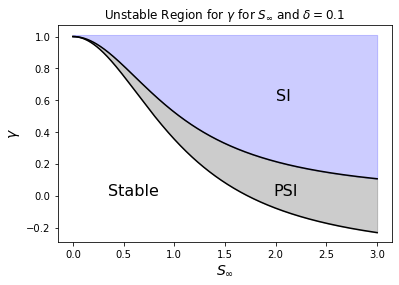

In [9]:
plt.fill_between(Sinf,gd,gamma_upper_limit(Sinf,deltafix),color="k",alpha=0.2)
plt.fill_between(Sinf,gamma_upper_limit(Sinf,deltafix),1.01,color="b",alpha=0.2)
plt.plot(Sinf,gamma_upper_limit(Sinf,deltafix),c="k")
plt.plot(Sinf,gd,c="k")
plt.ylabel(r"$\gamma$",fontsize=14)
plt.xlabel(r"$S_\infty$",fontsize=14)
plt.text(2,0.6,"SI",fontsize=16)
plt.text(1.98,0,"PSI",fontsize=16)
plt.text(0.35,0,"Stable",fontsize=16)
plt.title(r"Unstable Region for $\gamma$ for $S_\infty$ and $\delta=0.1$")
plt.savefig("Stability_Diagram_delta_0_5.jpeg")
# plt.yscale("symlog",linthresh=1e-3)
plt.show()

In [17]:
delta = np.arange(0,1,0.001)
Sfix = 0.025 #np.sqrt(3)#(1e-5/5)**(0.5)*(5*10**(-3))*1e4
gd2 = gamma_lower_limit(Sfix,delta)

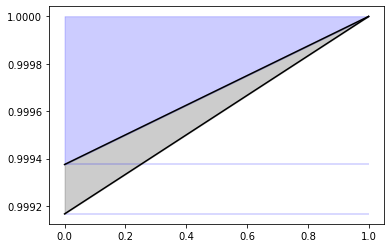

In [22]:
plt.fill_between(delta,gd2,gamma_upper_limit(Sfix,delta),color="k",alpha=0.2)
plt.fill_between(delta,gamma_upper_limit(Sfix,delta),1,color="b",alpha=0.2)
plt.plot(delta,gd2,c="k")
plt.plot(delta,gamma_upper_limit(Sfix,delta),c="k")
plt.hlines(gamma_upper_limit_no_delta(Sfix),xmin=0,xmax=1,color="b",alpha=0.2)
plt.hlines(gamma_lower_limit_no_delta(Sfix),xmin=0,xmax=1,color="b",alpha=0.2)

# plt.ylabel(r"$\gamma$",fontsize=14)
# plt.xlabel(r"$\delta$",fontsize=14)
# plt.text(0.4,0.8,"SI",fontsize=16)
# plt.text(0.39,0.53,"PSI",fontsize=16)
# plt.text(0.7,0.45,"Stable",fontsize=16)
# plt.title(r"Unstable Region for $\gamma$ for $S_\infty=1$ and $\delta$")
plt.show()

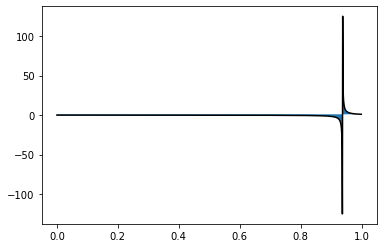

In [14]:
plt.fill_between(delta,gd2,1.)
plt.plot(delta,gd2,c="k")

In [15]:
f = 1e-4
N2 = Sinf**2*f**2/(5e-3)**2

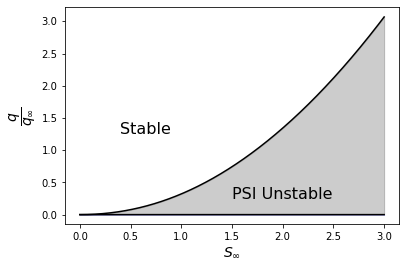

In [16]:
plt.fill_between(Sinf,(1-gd*(1+Sinf**2)+gd*deltafix*Sinf**2),(1-gamma_upper_limit(Sinf,deltafix)*(1+Sinf**2)+gamma_upper_limit(Sinf,deltafix)*deltafix*Sinf**2),color="k",alpha=0.2) #,hatch="."
plt.fill_between(Sinf,10**(-20),(1-gamma_upper_limit(Sinf,deltafix)*(1+Sinf**2)+gamma_upper_limit(Sinf,deltafix)*deltafix*Sinf**2),color="b",alpha=0.2)
plt.plot(Sinf,(1-gamma_upper_limit(Sinf,deltafix)*(1+Sinf**2)+gamma_upper_limit(Sinf,deltafix)*deltafix*Sinf**2),c="k")
plt.plot(Sinf,(1-gd*(1+Sinf**2)+gd*deltafix*Sinf**2),c="k")
plt.ylabel(r"$\dfrac{q}{q_{\infty}}$",fontsize=14)
plt.xlabel(r"$S_\infty$",fontsize=14)
plt.text(0.4,1.25,"Stable",fontsize=16)
plt.text(1.5,0.25,"PSI Unstable",fontsize=16)
# plt.yscale("log")
# plt.title(r"PV for $\gamma$ for $S_\infty$ and $\delta=0.5$")
plt.savefig("PV_values_delta_0_5.pdf")
plt.show()

In [ ]:
def omega_permitted(vo,gamma,S,t):
    top = 1e-4*(1-gamma*(1+S)+1e4*t*vo)
    bottom = 1-gamma
    return 2*np.sqrt(top/bottom)

In [ ]:
vo = np.arange(0,1,1e-5)

In [ ]:
plt.plot(vo,omega_permitted(vo,0.5,1,5e-3),c="k")
plt.fill_between(vo,0,omega_permitted(vo,0.5,1,5e-3),color="k",alpha=0.2,hatch="/")
plt.xlabel(r"$v_o$ magnitude")
plt.ylabel("Frequency")
plt.title(r"Frequency for $\gamma=0.5$, $S_\infty^2=1$, and $\theta=5\times 10^{-3}$")
plt.text(3e-4,2e-3,"Unstable Frequencies",fontsize=16)
plt.text(1e-5,5e-3,"Stable Frequencies",fontsize=16)
plt.show()

In [ ]:
def omega_permitted_our_setup(gamma,S,delta):
    top = 1e-4*(1-gamma*(1+S)+delta*S*gamma)
    bottom = 1-gamma
    return 2*np.sqrt(top/bottom)

In [ ]:
def gamma_upper_limit_adj(S,d):
    return 0.999*((1+S**2)-d*S**2)**(-1)

In [ ]:
dt_l = np.arange(0,1,0.01)

In [ ]:
plt.plot(dt_l,omega_permitted_our_setup(-1,1,dt_l),c="k")
plt.fill_between(dt_l,1e-6,omega_permitted_our_setup(-1,1,dt_l),color="k",alpha=0.2,hatch="/")
plt.hlines(1e-4*np.sqrt(2),xmin=dt_l[0],xmax=dt_l[-1],color="r")
plt.xlabel(r"$\delta$")
plt.ylabel("Frequency")
# plt.yscale("log")
plt.title(r"Frequency for $\gamma=0.999\gamma^u$, $S_\infty^2=1$, and $\delta$ vary")
# plt.text(0.21,8e-3,"Unstable Frequencies",fontsize=16)
# plt.text(0.3,5e-3,"Stable Frequencies",fontsize=16)
plt.show()

In [ ]:
plt.plot(dt_l,omega_permitted_our_setup(gamma_lower_limit(1,dt_l),1,dt_l),c="k")
plt.fill_between(dt_l,1e-6,omega_permitted_our_setup(gamma_lower_limit(1,dt_l),1,dt_l),color="k",alpha=0.2,hatch="/")
plt.hlines(1e-4*np.sqrt(2),xmin=dt_l[0],xmax=dt_l[-1],color="r")
plt.xlabel(r"$\delta$")
plt.ylabel("Frequency")
# plt.yscale("log")
plt.title(r"Frequency for $\gamma=\gamma^l$, $S_\infty^2=1$ and $\delta$ vary")
plt.text(0.21,8e-3,"Unstable Frequencies",fontsize=16)
# plt.text(0.3,5e-3,"Stable Frequencies",fontsize=16)
plt.show()